# 🌡️🔥 Day 7 Challenge
## Heatwave of Insights: Mastering Temperature Data with Pandas, Visualization, EDA, and Stats!

### 📂 Dataset:
"https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities"

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Pandas

# Q1: Load a dataset containing city temperatures over several years. Group the data by city and calculate the average temperature for each city.

In [232]:
df = pd.read_csv('city_temperature.csv',low_memory=False)
df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [233]:
avg_temp_city = df.groupby('City')['AvgTemperature'].mean().sort_values(ascending = False)
avg_temp_city

City
Dubai               82.972631
Chennai (Madras)    82.847021
Doha                82.235625
Abu Dhabi           82.192499
Niamey              81.951619
                      ...    
Frankfurt          -13.668786
Lilongwe           -20.585544
Georgetown         -22.101520
Bonn               -46.868050
Bujumbura          -65.397138
Name: AvgTemperature, Length: 321, dtype: float64

# Q2: Create a new column indicating the temperature difference from the previous day for each city.

In [235]:
# df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
# df['Date']

In [236]:
print(df.iloc[58204])

Region                 Africa
Country              Ethiopia
State                     NaN
City              Addis Ababa
Month                      12
Day                        29
Year                      201
AvgTemperature          -99.0
Name: 58204, dtype: object


In [237]:
df = df[df['Year'] > 1000]
df = df[df['AvgTemperature'] != -99.0]

In [238]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['Date']

0         1995-01-01
1         1995-01-02
2         1995-01-03
3         1995-01-04
4         1995-01-05
             ...    
2906322   2013-07-27
2906323   2013-07-28
2906324   2013-07-29
2906325   2013-07-30
2906326   2013-07-31
Name: Date, Length: 2826655, dtype: datetime64[ns]

In [239]:
df = df.sort_values(by = ['City', 'Date'])
df['Temp_diff'] = df.groupby('City')['AvgTemperature'].diff()
df.head(10)

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date,Temp_diff
96499,Africa,Ivory Coast,NaN,Abidjan,1,1,1995,82.6,1995-01-01,NaN
96500,Africa,Ivory Coast,NaN,Abidjan,1,2,1995,82.3,1995-01-02,-0.3
96501,Africa,Ivory Coast,NaN,Abidjan,1,3,1995,81.0,1995-01-03,-1.3
96502,Africa,Ivory Coast,NaN,Abidjan,1,4,1995,83.3,1995-01-04,2.3
96503,Africa,Ivory Coast,NaN,Abidjan,1,5,1995,83.4,1995-01-05,0.1
96504,Africa,Ivory Coast,NaN,Abidjan,1,6,1995,84.1,1995-01-06,0.7
96505,Africa,Ivory Coast,NaN,Abidjan,1,7,1995,82.5,1995-01-07,-1.6
96506,Africa,Ivory Coast,NaN,Abidjan,1,8,1995,81.3,1995-01-08,-1.2
96507,Africa,Ivory Coast,NaN,Abidjan,1,9,1995,79.7,1995-01-09,-1.6
96508,Africa,Ivory Coast,NaN,Abidjan,1,10,1995,80.9,1995-01-10,1.2


# Q3: Filter out cities where the average temperature over the given period is below 15°C.

In [241]:
city_month_temp_stats = df.groupby(['City', 'Month'])['AvgTemperature'].mean().reset_index(name = 'avg_temp')
cities_below_temp = city_month_temp_stats[city_month_temp_stats['avg_temp'] < 15]
cities_below_temp

,City,Month,avg_temp
468,Bismarck,1,13.715796
804,Caribou,1,12.857516
1224,Duluth,1,11.871925
1248,Edmonton,1,12.777692
1259,Edmonton,12,14.070752
1320,Fairbanks,1,-8.707329
1321,Fairbanks,2,0.734558
1322,Fairbanks,3,10.646030
1330,Fairbanks,11,4.632267
1331,Fairbanks,12,-4.184306


# Visualization

# Q1: Create a box plot to compare the temperature distribution across different cities.

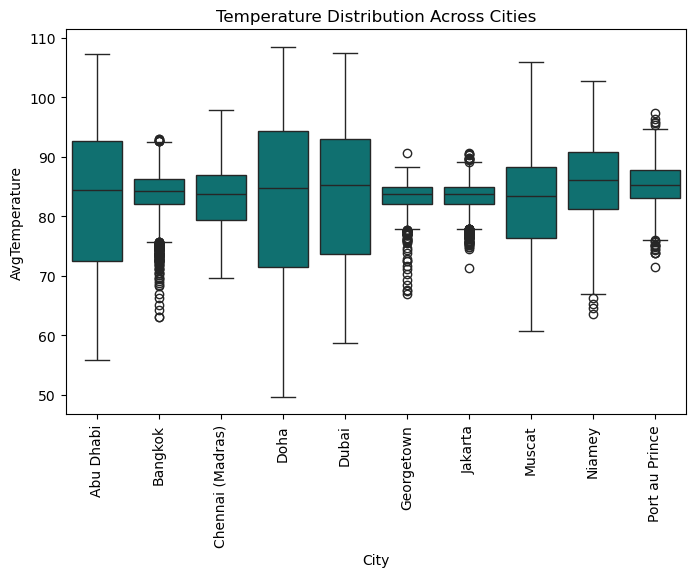

In [244]:
top_cities = df.groupby('City')['AvgTemperature'].mean().sort_values(ascending = False).head(10)
top_cities_data = df[df['City'].isin(top_cities.index)]
top_cities_data

plt.figure(figsize = (8,5))
sns.boxplot(data = top_cities_data, x = 'City', y = 'AvgTemperature', color = 'teal')
plt.xticks(rotation=90)
plt.title('Temperature Distribution Across Cities')
plt.show()

# Q2: Plot a line graph showing the temperature trends over time for the top 3 hottest cities.

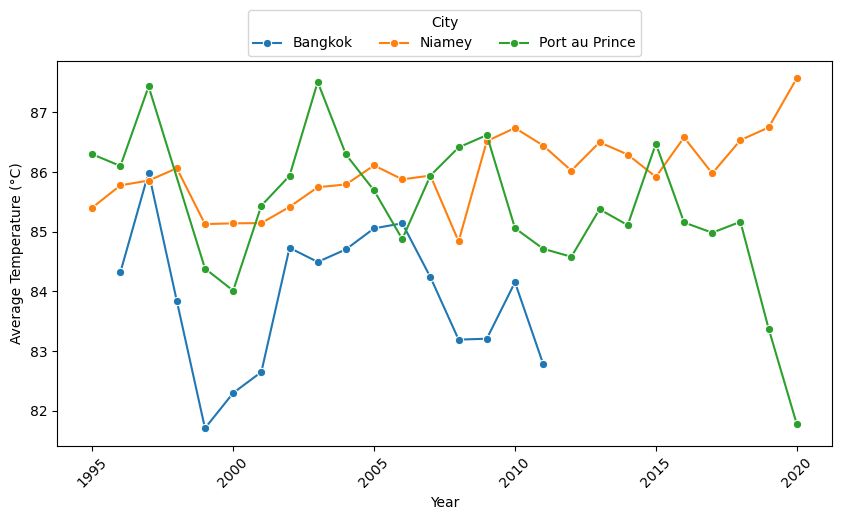

In [246]:
hottest_city_3 = df.groupby('City')['AvgTemperature'].mean().sort_values(ascending = False).head(3)
hottest_city_3_data = df[df['City'].isin(hottest_city_3.index)]

plt.figure(figsize = (10,5))
sns.lineplot(data = hottest_city_3_data, x = 'Year', y = 'AvgTemperature', hue = 'City', marker = 'o', linewidth=1.5, errorbar=None)
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='City', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

plt.xticks(rotation=45)
plt.show()

# EDA

# Q1: Perform a basic statistical analysis of the temperature data. Report mean, median, standard deviation, and any significant outliers.

In [249]:
print(f"Mean: {round(df['AvgTemperature'].mean(),4)}")
print(f"Median: {round(df['AvgTemperature'].median(),4)}")
print(f"Std. Deviation: {round(df['AvgTemperature'].std(),4)}")

Q1 = df['AvgTemperature'].quantile(0.25)
Q3 = df['AvgTemperature'].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
LW = Q1 - 1.5*IQR
outliers = (df['AvgTemperature'] < LW) | (df['AvgTemperature'] > UW)
print(f"Outliers: {outliers.sum()}")

Mean: 60.3739
Median: 63.3
Std. Deviation: 19.0974
Outliers: 17320


# Statistics

# Q1: Perform a one-sample t-test to determine if the average temperature of the hottest city is significantly different from 30°C.

In [252]:
hottest_city = df.groupby('City')['AvgTemperature'].mean().sort_values(ascending = False).head(1)

hottest_city_name = hottest_city.index[0]

hottest_city_data = df[df['City'] == hottest_city_name]

t_stat, p_val = stats.ttest_1samp(hottest_city_data['AvgTemperature'].dropna(), popmean=30)

print(f"Hottest City: {hottest_city_name}")
print(f"t_stat: {t_stat:.4f}")
print(f"p_value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: The average temperature is significantly different from 30°C.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 30°C.")

Hottest City: Niamey
t_stat: 792.9528
p_value: 0.0000
Reject the null hypothesis: The average temperature is significantly different from 30°C.
